In [10]:
from sage.misc.prandom import randrange
from sage.matrix.berlekamp_massey import berlekamp_massey
from sage.plot.histogram import Histogram, histogram
import math, random, time
from matplotlib import pyplot as plt
import numpy as np

In [11]:
# change these primes!!!
primes = [957097, 890501, 417293, 612649, 496291]
zetas = [randrange(2, p) for p in primes]  
Ms = [randrange(1, 10) * ((int(math.log2(p))+1)**2) for p in primes]    # O(n^2) where n is number of bits (18) here

In [12]:
primes

[957097, 890501, 417293, 612649, 496291]

In [13]:
zetas

[733474, 130002, 319358, 128675, 137979]

In [14]:
Ms

[2000, 1200, 722, 3200, 2888]

In [15]:
# lc_hist 5 sets of 1000 samples LCs. Plot histograms from the same
lc_hist = []
for z,p,M in zip(zetas, primes, Ms):
    print(z,p,M)
    input_vec = np.random.randint(2,p,size=1000)
    lc_values = []
    for x in input_vec:
        y = Mod(x,p)
        S = []
        for i in range(math.ceil(M/2)*2):
            y = Mod(z,p) ** y
            S.append(y)
        lc_values.append(berlekamp_massey(S).degree())
    lc_hist.append(lc_values)

733474 957097 2000
130002 890501 1200
319358 417293 722
128675 612649 3200
137979 496291 2888


In [16]:
for lc in lc_hist:
    print(min(lc), max(lc))

17 1000
6 316
13 361
35 1600
40 471


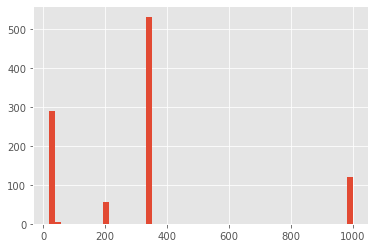

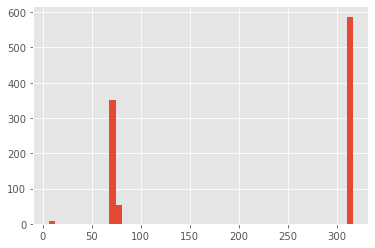

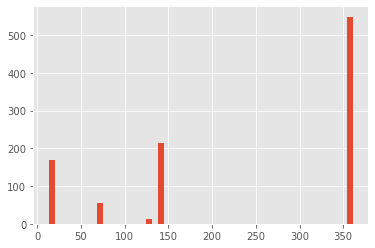

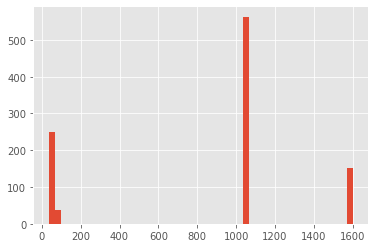

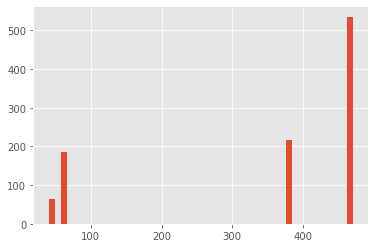

In [17]:
for lc in lc_hist:
    plt.style.use('ggplot')
    plt.hist(lc, bins=50)
    plt.show()